In [1]:
!pip3 install vcam

In [35]:
import cv2
import math
import numpy as np
from vcam import vcam,meshGen
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('Downloads\chess.png')

In [7]:
img.shape

(225, 225, 3)

In [8]:
H,W = img.shape[:2]

In [9]:
v1 = vcam(H=H,W=W)

In [10]:
plane = meshGen(H=H,W=W)

In [14]:
plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))

In [16]:
pts3d = plane.getPlane()

In [17]:
pts3d

array([[-112.5       , -111.49553571, -110.49107143, ...,  110.49107143,
         111.49553571,  112.5       ],
       [-112.5       , -112.5       , -112.5       , ...,  112.5       ,
         112.5       ,  112.5       ],
       [   1.00029734,    1.00037134,    1.00046282, ...,    1.00046282,
           1.00037134,    1.00029734],
       [   1.        ,    1.        ,    1.        , ...,    1.        ,
           1.        ,    1.        ]])

In [18]:
pts3d.shape

(4, 50625)

In [20]:
pts2d = v1.project(pts3d)

In [21]:
pts2d

array([[223.38581069, 222.39121366, 221.39659913, ...,   2.60340087,
          1.60878634,   0.61418931],
       [  0.61418931,   0.61427091,   0.61437179, ..., 223.38562821,
        223.38572909, 223.38581069]])

In [22]:
pts2d.shape

(2, 50625)

In [24]:
map_x,map_y = v1.getMaps(pts2d)

In [26]:
map_x.shape

(225, 225)

In [27]:
map_y.shape

(225, 225)

In [28]:
225*225*2

101250

In [29]:
50625*2

101250

In [30]:
output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

In [31]:
cv2.imshow("Funny Mirror",output)
cv2.imshow("Input and output",np.hstack((img,output)))
cv2.waitKey(0)

-1

## 1. Z = 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))

In [36]:
def magic_mirror(image_path):
    # Reading the input image. Pass the path of image you would like to use as input image.
    img = cv2.imread(image_path)
    H,W = img.shape[:2]
 
    # Creating the virtual camera object
    c1 = vcam(H=H,W=W)
 
    # Creating the surface object
    plane = meshGen(H,W)
 
    # We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((x/w)^2 / 2*0.1*sqrt(2*pi))
    plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))

    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
 
    cv2.imshow("Funny Mirror",output)
    cv2.imshow("Input and output",np.hstack((img,output)))
    cv2.waitKey(0)
    
    plt.imshow(np.hstack((img,output)))

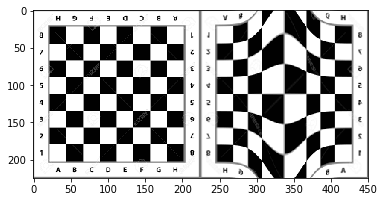

In [37]:
magic_mirror("Downloads/chess.png")

In [34]:
def magic_fun(img):
    H,W = img.shape[:2]
    c1 = vcam(H=H,W=W)
    plane = meshGen(H,W)
    plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
    
    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
    
    return output

def magic_camera():
    cap = cv2.VideoCapture(0)
    
    while True:
        status,frame = cap.read()
        frame = magic_fun(frame)
        
        cv2.imshow("Magic Mirror",frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
            
    cv2.destroyAllWindows()
    cap.release()
    
magic_camera()

## 2. Z = 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))

In [42]:
def magic_mirror(image_path):
    # Reading the input image. Pass the path of image you would like to use as input image.
    img = cv2.imread(image_path)
    H,W = img.shape[:2]
 
    # Creating the virtual camera object
    c1 = vcam(H=H,W=W)
 
    # Creating the surface object
    plane = meshGen(H,W)
 
    # We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((x/w)^2 / 2*0.1*sqrt(2*pi))
    plane.Z += 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))


    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
 
    cv2.imshow("Funny Mirror",output)
    cv2.imshow("Input and output",np.hstack((img,output)))
    cv2.waitKey(0)
    
    plt.imshow(np.hstack((img,output)))

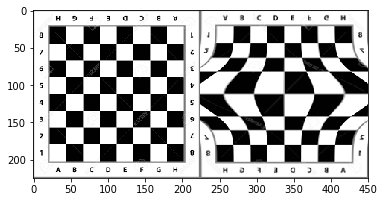

In [43]:
magic_mirror("Downloads/chess.png")

In [44]:
def magic_fun(img):
    H,W = img.shape[:2]
    c1 = vcam(H=H,W=W)
    plane = meshGen(H,W)
    plane.Z += 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
    
    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
    
    return output

def magic_camera():
    cap = cv2.VideoCapture(0)
    
    while True:
        status,frame = cap.read()
        frame = magic_fun(frame)
        
        cv2.imshow("Magic Mirror",frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
            
    cv2.destroyAllWindows()
    cap.release()
    
magic_camera()

## 3. Z = 20*np.sin(2*np.pi*((plane.X-plane.W/4.0)/plane.W)) + 20*np.sin(2*np.pi*((plane.Y-plane.H/4.0)/plane.H))

In [45]:
def magic_mirror(image_path):
    # Reading the input image. Pass the path of image you would like to use as input image.
    img = cv2.imread(image_path)
    H,W = img.shape[:2]
 
    # Creating the virtual camera object
    c1 = vcam(H=H,W=W)
 
    # Creating the surface object
    plane = meshGen(H,W)
 
    # We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((x/w)^2 / 2*0.1*sqrt(2*pi))
    plane.Z += 20*np.sin(2*np.pi*((plane.X-plane.W/4.0)/plane.W)) + 20*np.sin(2*np.pi*((plane.Y-plane.H/4.0)/plane.H))


    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
 
    cv2.imshow("Funny Mirror",output)
    cv2.imshow("Input and output",np.hstack((img,output)))
    cv2.waitKey(0)
    
    plt.imshow(np.hstack((img,output)))

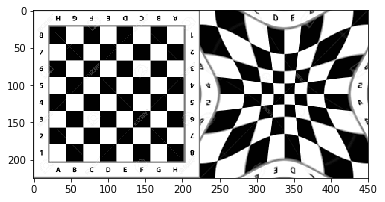

In [46]:
magic_mirror("Downloads/chess.png")

In [47]:
def magic_fun(img):
    H,W = img.shape[:2]
    c1 = vcam(H=H,W=W)
    plane = meshGen(H,W)
    plane.Z += 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
    
    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
    
    return output

def magic_camera():
    cap = cv2.VideoCapture(0)
    
    while True:
        status,frame = cap.read()
        frame = magic_fun(frame)
        
        cv2.imshow("Magic Mirror",frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
            
    cv2.destroyAllWindows()
    cap.release()
    
magic_camera()

## 4. Z = 100*np.sqrt((plane.X*1.0/plane.W)**2+(plane.Y*1.0/plane.H)**2)

In [48]:
def magic_mirror(image_path):
    # Reading the input image. Pass the path of image you would like to use as input image.
    img = cv2.imread(image_path)
    H,W = img.shape[:2]
 
    # Creating the virtual camera object
    c1 = vcam(H=H,W=W)
 
    # Creating the surface object
    plane = meshGen(H,W)
 
    # We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((x/w)^2 / 2*0.1*sqrt(2*pi))
    plane.Z -= 100*np.sqrt((plane.X*1.0/plane.W)**2+(plane.Y*1.0/plane.H)**2)

    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
 
    cv2.imshow("Funny Mirror",output)
    cv2.imshow("Input and output",np.hstack((img,output)))
    cv2.waitKey(0)
    
    plt.imshow(np.hstack((img,output)))

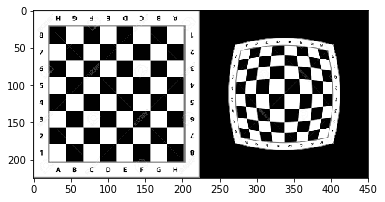

In [49]:
magic_mirror("Downloads/chess.png")

In [50]:
def magic_fun(img):
    H,W = img.shape[:2]
    c1 = vcam(H=H,W=W)
    plane = meshGen(H,W)
    plane.Z -= 100*np.sqrt((plane.X*1.0/plane.W)**2+(plane.Y*1.0/plane.H)**2)
    
    pts3d = plane.getPlane()
 
    pts2d = c1.project(pts3d)
    map_x,map_y = c1.getMaps(pts2d)
 
    output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)
    
    return output

def magic_camera():
    cap = cv2.VideoCapture(0)
    
    while True:
        status,frame = cap.read()
        frame = magic_fun(frame)
        
        cv2.imshow("Magic Mirror",frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
            
    cv2.destroyAllWindows()
    cap.release()
    
magic_camera()